In [130]:
import create_r3d_functions as c3d

# See below on c5d
# length of side of grid is 7.24 AU
# the star is within 1au and 2 au approximately
# cell size is 0.023 AU
c3d.create_grid(7.24,20,[4,3,2,1])



Creating amr_grid with octree refinement.
Length of total side of whole grid: 7.24 AU
Number of base cells along one side of the grid: 20
Distances to refinement limits from centrum: [4, 3, 2, 1] AU
Number refinements: 4
Size of base cell: 0.362 AU
Child cell size 1: 0.181 AU
Child cell size 2: 0.0905 AU
Child cell size 3: 0.04525 AU
Child cell size 4: 0.022625 AU
Writing amr_grid.inp
Finished amr_grid.inp
Writing grid_distances.csv and grid_cellsizes.csv
(Not necessary for Radmc3d, but useful for pre/portprocessing of your model. They have the same order as dust_densities.inp)
Finished grid_distances.csv
Finished grid_cellsizes.csv
Writing grid_info.txt
Finished grid_info.txt
Create grid: done.



In [2]:
from bhmie.makedustopac import *

compute_opac_mie()



In [2]:
import analyze_r3d_functions as a3d
import numpy as np

wavelengths,nwave = a3d.load_wavelengthgrid()

print(
    np.array([
        wavelength*1e-4 for wavelength in wavelengths
    ])
)

[1.00000000e-05 1.10520985e-05 1.22148882e-05 1.35000147e-05
 1.49203493e-05 1.64901170e-05 1.82250398e-05 2.01424935e-05
 2.22616822e-05 2.46038305e-05 2.71923959e-05 3.00533038e-05
 3.32152074e-05 3.67097745e-05 4.05720044e-05 4.48405790e-05
 4.95582496e-05 5.47722657e-05 6.05348477e-05 6.69037100e-05
 7.39426394e-05 8.17221335e-05 9.03201070e-05 9.98226721e-05
 1.10325001e-04 1.21932277e-04 1.34760754e-04 1.48938913e-04
 1.64608754e-04 1.81927217e-04 2.01067752e-04 2.22222061e-04
 2.45602011e-04 2.71441762e-04 3.00000109e-04 3.31563076e-04
 3.66446778e-04 4.05000589e-04 4.47610641e-04 4.94703690e-04
 5.46751392e-04 6.04275025e-04 6.67850710e-04 7.38115184e-04
 8.15772173e-04 9.01599442e-04 9.96456586e-04 1.10129364e-03
 1.21716057e-03 1.34521786e-03 1.48674803e-03 1.64316857e-03
 1.81604609e-03 2.00711203e-03 2.21827999e-03 2.45166490e-03
 2.70960420e-03 2.99468125e-03 3.30975122e-03 3.65796965e-03
 4.04282410e-03 4.46816902e-03 4.93826442e-03 5.45781849e-03
 6.03203476e-03 6.666664

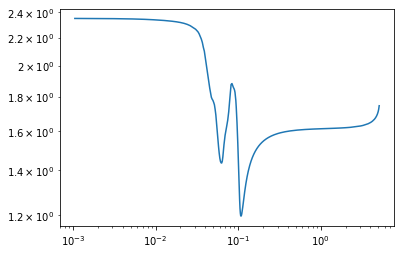

In [2]:
import numpy as np
import matplotlib.pyplot as plt

mg2sio4 = np.loadtxt('../bhmie/lnk/mg2sio4.lnk',delimiter=' ')

plt.plot(1/mg2sio4[:,0],mg2sio4[:,1])
plt.xscale('log')
plt.yscale('log')





In [1]:
import opacity_r3d_functions as o3d


o3d.create_kappaabs(
    optconstlist=['al2o3porous','mg2sio4'],
    agrainlist=[0.10,0.13,0.17,0.22,0.28,0.36,0.46,0.60,0.77,1.00]
)

För proof of concept-koden:

Använd dessa agrainum:

Avrunda till 2 decimaler

agrain      range

0.10   0.074 - 0.135

0.13   0.096 - 0.175

0.17   0.129 - 0.229

0.22   0.163 - 0.297

0.28   0.207 - 0.378

0.36   0.267 - 0.486

0.46   0.341 - 0.621

0.60   0.444 - 0.810

0.77   0.570 - 1.039

1.00   0.741 - 1.350

In [1]:
import analyze_r3d_functions as a3d
import create_r3d_functions as c3d


c3d.create_spheredensity(
    optconstlist=['al2o3porous','mg2sio4'],
    agrainlist=[0.10,1.00]    
)


Writing dust_density.inp
0.4041451884327381 0.1 0
0.3696845502136472 0.1 0
0.34480268109295337 0.1 0
0.33166247903553997 0.1 0
0.33166247903553997 0.1 0
0.34480268109295337 0.1 0
0.3696845502136472 0.1 0
0.4041451884327381 0.1 0
0.3696845502136472 0.1 0
0.33166247903553997 0.1 0
0.30368111930480995 0.1 0
0.2886751345948129 0.1 0
0.2886751345948129 0.1 0
0.30368111930480995 0.1 0
0.33166247903553997 0.1 0
0.3696845502136472 0.1 0
0.34480268109295337 0.1 0
0.30368111930480995 0.1 0
0.2728450923957484 0.1 0
0.2560381915956203 0.1 0
0.2560381915956203 0.1 0
0.2728450923957484 0.1 0
0.30368111930480995 0.1 0
0.34480268109295337 0.1 0
0.33166247903553997 0.1 0
0.2886751345948129 0.1 0
0.2560381915956203 0.1 0
0.23804761428476173 0.1 0
0.23804761428476173 0.1 0
0.2560381915956203 0.1 0
0.2886751345948129 0.1 0
0.33166247903553997 0.1 0
0.33166247903553997 0.1 0
0.2886751345948129 0.1 0
0.2560381915956203 0.1 0
0.23804761428476173 0.1 0
0.23804761428476173 0.1 0
0.2560381915956203 0.1 0
0.2886

# co5bold data - anteckningar

- i teststjärnan ['Z'][0][0]

    [7], 10 tid i sekunder

    [13] - time step number

    [16], [19], [22] - cellcentrumkoordinater i cm

    [25],28,31     - cellboundary coords i cm

    [34][x][y][z] - Detta är stjärnans densiteter i g/cm3 

    [37] - internal energy erg/g - för att göra om till temperaturer? Behövs ej för Bernd har redan gjort det.

    [40][x][y][z] - Number densities av Mg2SiO4 - Fosterite i cm^-3

    [43][x][y][z] - Number densities av Al2O3 - Corundum

    These are number densities of monomers. So the Mass density of each cell = molecular mass in gram * number density

    Eg Mg2SiO4: ```2*24.305u + 28.085u + 4*15.999u = 140.69u = 2.3362e-22 gram``` per monomer

- teststar['EOS'][0][0]

    [0] - är 317**3 (innehåller 2 arrayer-arrayer)

    Nästa steg [0] har 317**2

    Nästa har 317. Så det är nåt värde per cell

    Alla är i stolreken 1e-4

    [1] - är 317 x 317 x 317 stor matris med värden mellan 691 och 50441

    Dessa är nog temperaturerna som Bernd har räknat ut åt mig!

    Tstar = teststar['EOS'][0][0][1][x][y][z]

- teststar['OPA']... - opaciteter, kappa skrivs i infon - vll jag ha - hitta unique här och se om du kan minska ner till ett tiotal kappa

    ['OPA'][0][0][0] är en 317**3 array.
    
    Så den är rumsberoende, men itne våglängdberoende?

    ['OPA'][0][0][0][x][y][z]

    Om jag avrundar dessa till närmsta 10tal så har jag bara 6st unika värden kvar - dvs 6st stardust-species

- ['PAR'] - har info om själva beräkningstid etc, inställningar

    ['PAR'][0][0][2] Är stjärnans detaljer:

```py
[b'Parameter file for RHD code:',
       b'3D dusty AGB star model: 1 M_Sun, 355 R_Sun, L=7000 L_Sun',
       b'Start model st28gm06n052_001.sta with 679^3 points',
       b'  based on st28gm06n050_300.end,',
       b'  extended inner and outer grid with rhd_manipulate.pro',
       b'Code version 2020-02-06:  MPI + OpenMP',
       b'Non-interacting forsterite+corundum dust, ar_dustrainabu: 3.0E-16',
       b'Non-grey 3-cluster opacity table:',
       b'  t2800gm050mm00_coma_opal_paola_oc1r_b3_n04.opta',
       b'"Big Box" buffer layer: N_radThinPoint=101+6, radThinHeatScheme=ConstantLum',
       b'Radiation pressure: radThinPressScheme=ConstantLum',
       b'From n034 on: c_radthintfactor=0.75->0.77'], dtype=object)
```

The heavier grid is (29.7AU)**3 (14.8AU from centre to edge)

The smallest cells are 0.026AU, ca 6AU from centre these grow to a maximum of ca 0.13AU

Dust starts at around 2-2.5AU
and dust density goes drastically down before 5 AU.

- Diverse data

```py
# Size of grid
print(np.shape(teststar['EOS'][0][0][0]))

# Number of cells along each axis
print(teststar['Z'][0][0][4])

# Total time(?)
print(f"{teststar['Z'][0][0][7]} {teststar['Z'][0][0][8]}")
```




In [13]:
# Notebook for exploring the data insize the sav-file

import numpy as np
import matplotlib.pyplot as plt
from scipy.io.idl import readsav

AUcm = 1.49598e13 # cm

teststar = readsav('../co5bold_data/dst28gm06n052/st28gm06n052_186.sav')
teststar = teststar['ful']

# Dict-columns
print(teststar.dtype.names)
print('\n\n')

# Print some contents of your chosing
nn = 0
print(teststar['OPA'][0][0][1])
#print(teststar['EOS'][0][0][nn+1])
#print(teststar['EOS'][0][0][nn+2])



('TYPE', 'HEAD', 'DATASET_ID', 'DATASET_ID__UNIT', 'DATASET_ID__NAME', 'MODELTIME', 'MODELTIME__UNIT', 'MODELTIME__NAME', 'MODELTIME_DB', 'MODELTIME_DB__UNIT', 'MODELTIME_DB__NAME', 'MODELITIME', 'MODELITIME__UNIT', 'MODELITIME__NAME', 'DTIME', 'DTIME__UNIT', 'DTIME__NAME', 'TIME_OUT_FULL_LAST', 'TIME_OUT_FULL_LAST__UNIT', 'TIME_OUT_FULL_LAST__NAME', 'TIME_OUT_MEAN_LAST', 'TIME_OUT_MEAN_LAST__UNIT', 'TIME_OUT_MEAN_LAST__NAME', 'Z', 'EOS', 'OPA', 'PAR')





IndexError: invalid index (1)

In [10]:
import numpy as np

data = np.zeros(679**3)
nn = 0
for nz in range(679):
    for ny in range(679):
        for nx in range(679):
            data[nn] = teststar['EOS'][0][0][0][nx][ny][nz]
            nn += 1



In [16]:
import matplotlib.pyplot as plt

plt.plot(data,'.',markersize=1)

Error: Canceled future for execute_request message before replies were done

In [62]:
import analyze_co5bold_functions as a5d

cellsize,cellcourners = a5d.load_grid_cellsizes(savpath='../co5bold_data/dst28gm06n052/st28gm06n052_186.sav')

c5dgrid = a5d.load_grid_coordinates(savpath='../co5bold_data/dst28gm06n052/st28gm06n052_186.sav')/AUcm


/usr/lib/python3/dist-packages/scipy/io/idl.py:469: UserWarning: Using experimental 64-bit array read
  warnings.warn("Using experimental 64-bit array read")


In [64]:
cellsize/AUcm

0.02582559459671921

(0, 0.15)

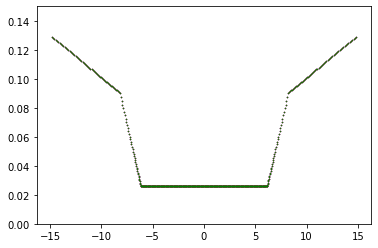

In [63]:
nc5dedge = np.shape(cellcourners)[0]


# And lists for cellsizes
cellsizesx = []
cellsizesy = []
cellsizesz = []

for nn in range(nc5dedge):
    cellsizesx.append(
        (teststar['Z'][0][0][25][0][0][nn+1] - teststar['Z'][0][0][25][0][0][nn])/AUcm
    )
    cellsizesy.append(
        (teststar['Z'][0][0][28][0][nn+1] - teststar['Z'][0][0][28][0][nn])[0]/AUcm
    )
    cellsizesz.append(
        (teststar['Z'][0][0][31][nn+1] - teststar['Z'][0][0][31][nn])[0][0]/AUcm
    )

import matplotlib.pyplot as plt

plt.plot(c5dgrid[:,0],cellsizesx,'b.',markersize=1)
plt.plot(c5dgrid[:,0],cellsizesy,'r.',markersize=1)
plt.plot(c5dgrid[:,0],cellsizesz,'g.',markersize=1)

plt.ylim(0,0.15)

# As seen here, the cells in thsi grid increases after 6AU


In [23]:
nn = 40

print(np.shape(teststar['Z'][0][0][nn]))
#print(teststar['Z'][0][0][40]+teststar['Z'][0][0][43])
print(teststar['Z'][0][0][nn+1])
print(teststar['Z'][0][0][nn+2])
print(f"{str(teststar['Z'][0][0][42+3*1])[4:-1]}")

print(int((len(teststar['Z'][0][0]) - 40)/3))

(679, 679, 679)
b'1/cm^3'
b'n_forsterite'
corundum
2


In [ ]:
c5dstar_densities, c5dstar_temperatures = a5d.load_star_properties(
    savpath='../co5bold_data/dst28gm06n052/st28gm06n052_186.sav'
)



In [1]:
import analyze_co5bold_functions as a5d
a5d.create_dust_files(Nspecies=2,grainsizeum=[0.1,0.1],graindensity=[2,2])

Loading R3D grid


KeyboardInterrupt: 

In [1]:
import create_r3d_functions as c3d

#c3d.merge_dustdensities(['../dust_density_manyspeciestest.inp','dust_density_star.inp'])
c3d.merge_dustdensities(['dust_density_manyspeciestest.inp','dust_density_manyspeciestest.inp'])

Merging 2 dust_density_*.inp files.


/home/joachim/exwings/exwings-codes/analyze_r3d_functions.py:441: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/joachim/exwings/exwings-codes/analyze_r3d_functions.py:458: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


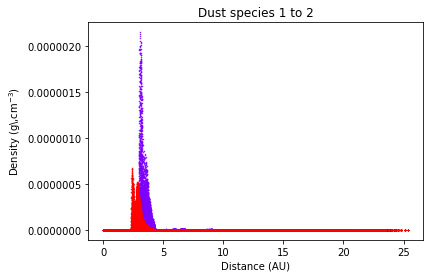

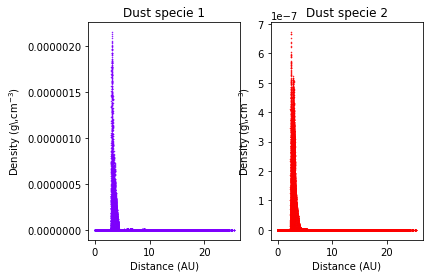

In [4]:
import analyze_r3d_functions as a3d

a3d.plot_alldensity_radius('../dust_density_dust.inp')

/tmp/ipykernel_23520/2424190964.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


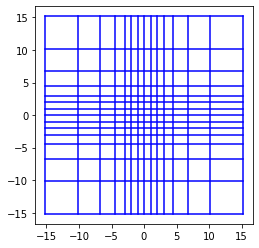

In [5]:
# Sketch of CO5BOLD grid
import matplotlib.pyplot as plt
x = [-15.188,-10.125,-6.75,-4.5,
    -3,-2,-1,0,1,2,3,
    4.5,6.75,10.125,15.188
]
fig, ax = plt.figure(), plt.axes()

for coord in x:
    ax.plot([coord,coord],[x[0],x[-1]],'b')
    ax.plot([x[0],x[-1]],[coord,coord],'b')
ax.set_aspect('equal', 'box')
fig.show()



In [2]:
import numpy as np

A = np.random.random((10,10,10))
B = np.array([1,2,3])

print(A.shape)

with open('../testA.npy', 'wb') as ftemp:
    np.save(
        ftemp, A,
        allow_pickle=True, 
        fix_imports=False
    )
with open('../testB.npy', 'wb') as ftemp:
    np.save(
        ftemp, B,
        allow_pickle=True, 
        fix_imports=False
    )
# np.savez to save in archive?


(10, 10, 10)


In [1]:
import analyze_co5bold_functions as a5d
a5d.load_c5dheavydata()


/usr/lib/python3/dist-packages/scipy/io/idl.py:469: UserWarning: Using experimental 64-bit array read
  warnings.warn("Using experimental 64-bit array read")


load_c5dheavydata:
    c5dgas_density.npy
    c5ddust_density.npy
    c5dgas_opacity.npy
    c5d_temperature.npy
DONE



In [9]:
import numpy as np


A = np.load('../c5ddust_density.npy')

print(A.shape)
print(A[1,0,1,0])


(1, 679, 679, 679)


IndexError: index 1 is out of bounds for axis 0 with size 1

In [1]:
import analyze_co5bold_functions as a5d

a5d.load_dustgas_densities(
    savpath='../co5bold_data/dst28gm06n052/st28gm06n052_186.sav'
)


A = np.load('../c5ddust_density.npy')

#print(f'load_c5dheavydata:\n    
#c5dgas_density_{phase}.npy\n    
#c5ddust_density_{phase}.npy\n    
#c5dgas_opacity_{phase}.npy\n    
#c5d_temperature_{phase}.npy\nDONE\n')




/usr/lib/python3/dist-packages/scipy/io/idl.py:469: UserWarning: Using experimental 64-bit array read
  warnings.warn("Using experimental 64-bit array read")


(array([[[1.88591687e-17, 2.11911480e-17, 2.44789048e-17, ...,
          2.94101387e-17, 3.18198548e-17, 3.32191532e-17],
         [1.98394555e-17, 2.19493567e-17, 2.51531397e-17, ...,
          3.33518032e-17, 3.38866615e-17, 3.27983035e-17],
         [2.10871747e-17, 2.29278286e-17, 2.57230258e-17, ...,
          3.35465380e-17, 3.30955129e-17, 3.20953059e-17],
         ...,
         [1.05078714e-17, 1.04427904e-17, 1.04772111e-17, ...,
          8.54977269e-16, 8.81742452e-16, 7.83625808e-16],
         [1.04988170e-17, 1.04336666e-17, 1.04666554e-17, ...,
          8.63967836e-16, 8.59785028e-16, 7.15064102e-16],
         [1.05992624e-17, 1.05346480e-17, 1.05671628e-17, ...,
          8.35025038e-16, 7.55038128e-16, 5.29163770e-16]],
 
        [[1.86198141e-17, 2.08878408e-17, 2.38583952e-17, ...,
          2.89247987e-17, 3.18436379e-17, 3.31871314e-17],
         [1.98463674e-17, 2.17748728e-17, 2.42908188e-17, ...,
          3.34001072e-17, 3.44653273e-17, 3.30498591e-17],
       